In [ ]:
"""
install the upgraded giverny package.
    - n.b. this only needs to be run once in your new container.
    - TEMPORARY until the new giverny package is installed by default in SciServer containers.
"""
!pip install --upgrade giverny

<hr style = "height:6px;border:none;background-color:sienna">

<h2 style = "font-weight:bold;font-style:italic">
    Getcutout_JHTDB_2 demo notebook
</h2>

<p style = "font-weight:bold;font-size:13px">
    &emsp;n.b. requires python 3.9+
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> :
    <br>
    &emsp;- SciServer processing of JHTDB datasets.
    <br><br>
    <u>supported datasets</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        isotropic1024coarse &ensp;: &ensp;isotropic 1024-cube (coarse).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        isotropic1024fine &ensp;: &ensp;isotropic 1024-cube (fine).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        isotropic4096 &ensp;: &ensp;isotropic 4096-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        isotropic8192 &ensp;: &ensp;isotropic 8192-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        sabl2048low &ensp;: &ensp;stable atmospheric boundary layer 2048-cube, low-rate timestep.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        sabl2048high &ensp;: &ensp;stable atmospheric boundary layer 2048-cube, high-rate timestep.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        rotstrat4096 &ensp;: &ensp;rotating stratified 4096-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        mhd1024 &ensp;: &ensp;magneto-hydrodynamic isotropic 1024-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        mixing &ensp;: &ensp;homogeneous buoyancy driven 1024-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        channel &ensp;: &ensp;channel flow.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        channel5200 &ensp;: &ensp;channel flow (reynolds number 5200).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        transition_bl &ensp;: &ensp;transitional boundary layer.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>functions</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        getCutout &ensp;: &ensp;read data for a user-specified box.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        write_cutout_hdf5_and_xmf_files &ensp;: &ensp;write getCutout results to .h5 and .xmf files.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        cutout_values &ensp;: &ensp;see values for specific point(s) in the getCutout data.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        contour_plot &ensp;: &ensp;create a contour plot of getCutout data.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    instantiate dataset
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- instantiate the dataset and cache the metadata.
    <br>

</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        auth_token &ensp;: &ensp;turbulence user authorization token.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        dataset_title &ensp;: &ensp;name of the turbulence dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        output_path &ensp;: &ensp;folder path in the "scratch" folder of the "Temporary" directory of the user's SciServer container.
        <br>
        &emsp;- default (if left blank) &ensp;: &ensp;/home/idies/workspace/Temporary/USERNAME/scratch/turbulence_output
        <br>
        &emsp;- output files will be saved in this folder.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [2]:
"""
instantiate dataset
"""
from giverny.turbulence_dataset import *
from giverny.turbulence_toolkit import *

auth_token = 'edu.jhu.pha.turbulence.testing-201406'
dataset_title = 'sabl2048high'
output_path = ''

# instantiate the dataset.
dataset = turb_dataset(dataset_title = dataset_title, output_path = output_path, auth_token = auth_token)

<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    getCutout
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- retrieve the user-requested box.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>steps</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        step 1 &ensp;: &ensp;identify the database files to be read.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        step 2 &ensp;: &ensp;read the database files and store the data in a matrix.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        x_range, y_range, z_range &ensp;: &ensp;axes ranges defining the box for which data values will be read.
        <br>
        &emsp;- specify each axis range as [minimum, maximum].
    </li>
    <li style = "font-weight:bold;font-size:13px">
        x_stride, y_stride, z_stride &ensp;: &ensp;axes strides, i.e. the number of points between each step along the axes.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        variable &ensp;: &ensp;type of data (velocity, pressure, energy, temperature, force, magneticfield, vectorpotential, density).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        timepoint &ensp;: &ensp;snapshot number.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        result &ensp;: &ensp;matrix corresponding to variable at timepoint in axes_ranges with strides.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [7]:
"""
process getCutout data
"""
variable = 'velocity'
timepoint = 1

x_range = [1, 1]
y_range = [1, 2048]
z_range = [1, 2048]

x_stride = 1
y_stride = 1
z_stride = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = np.array([x_range, y_range, z_range])
strides = np.array([x_stride, y_stride, z_stride])

# process a brick cutout.
result = getCutout(dataset, variable, timepoint, axes_ranges, strides)


-----
getCutout is processing...

total time elapsed = 16.689 seconds (0.278 minutes)

query completed successfully.
-----


<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    save cutout results
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- save the cutout retrieved by the getCutout function.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
         dataset &ensp;: &ensp;the instantiated dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         axes_ranges &ensp;: &ensp;parameter used by getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         result &ensp;: &ensp;output from getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        output_filename &ensp;: &ensp;filename for the tsv file to be saved in the output_path folder.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        hdf5, xmf files &ensp;: &ensp;saved to output_filename in the output_path folder.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [8]:
"""
write the cutout results to hdf5 and xmf files
"""
output_filename = 'turbulence-cutout'

"""
use the hdf5 and xmf writing gizmo.
"""
# writes the output hdf5 and xmf files.
write_cutout_hdf5_and_xmf_files(dataset, result, axes_ranges, output_filename)

writing the cutout .h5 and .xmf files...

files written successfully.
-----


<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    cutout values
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- retrieve the data value(s) for a datapoint (x, y, z), or a range of datapoints, e.g. x = range(1, 5), in the getCutout data.
    <br>
    &emsp;- note: range(min, max) will retrieve data values for points "min" through ("max" - 1).
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        dataset &ensp;: &ensp;the instantiated dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         axes_ranges, strides &ensp;: &ensp;parameters used by getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         result &ensp;: &ensp;output from getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        x &ensp;: &ensp;x-axis datapoint(s).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        y &ensp;: &ensp;y-axis datapoint(s).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        z &ensp;: &ensp;z-axis datapoint(s).
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        cutout_value &ensp;: &ensp;data value(s) of the requested datapoint(s).
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [10]:
"""
data values
"""
x = 1
y = 5
z = 8

"""
use the data values gizmo.
"""
cutout_value = cutout_values(dataset, x, y, z, result, axes_ranges, strides)

cutout_value

<xarray.DataArray 'Velocity_0001' (zcoor_uv: 1, ycoor: 1, xcoor: 1, values: 3)>
array([[[[1.4751614 , 1.0013452 , 0.14734012]]]], dtype=float32)
Coordinates:
  * zcoor_uv  (zcoor_uv) float32 1.465
  * ycoor     (ycoor) float32 0.7812
  * xcoor     (xcoor) float32 0.0
    zcoor_w   (zcoor_uv) float32 1.562
Dimensions without coordinates: values

<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    contour plot
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- create a contour plot from the getCutout data.
    <br>
    &emsp;- note: one of the axis ranges should be a single point, e.g. z_plot_range = [3, 3], since the contour plot is 2-dimensional.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        dataset &ensp;: &ensp;the instantiated dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         axes_ranges, strides &ensp;: &ensp;parameters used by getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         result &ensp;: &ensp;output from getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        x_plot_range &ensp;: &ensp;x-axis plot range.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        y_plot_range &ensp;: &ensp;y-axis plot range.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        z_plot_range &ensp;: &ensp;z-axis plot range.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         plot_ranges &ensp;: &ensp;combined array of x_plot_range, y_plot_range, and z_plot_range.
    </li>
    <br>
    <li style = "font-weight:bold;font-size:13px">
        plot_component &ensp;: &ensp;the component (column) of the values to plot.
        <br>
        &emsp;- 0 corresponds to the "ux" component of the velocity data or the scalar magnitude of the scalar data (e.g. pressure).
        <br>
        &emsp;- 1 corresponds to the "uy" component of the velocity data.
        <br>
        &emsp;- 2 corresponds to the "uz" component of the velocity data.
    </li>
    <br>
    <li style = "font-weight:bold;font-size:13px">
        output_filename &ensp;: &ensp;filename for the contour plot to be saved in the output_path folder.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        contour plot &ensp;: &ensp;displayed in the notebook and saved to output_filename in the output_path folder.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

generating contour plot...
-----


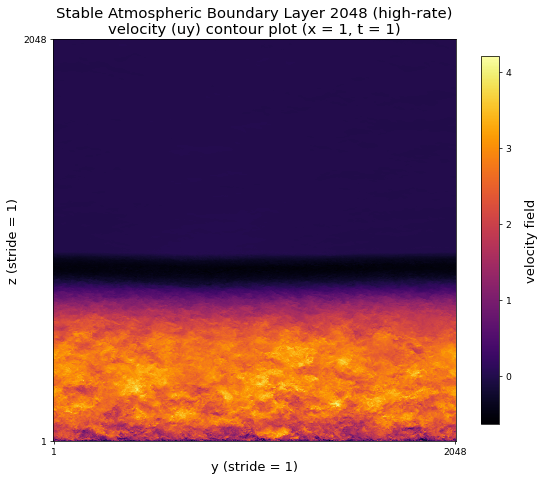

-----
contour plot created successfully.


In [13]:
"""
contour plot
"""
x_plot_range = x_range#[1, 1]
y_plot_range = y_range#[1, 32]
z_plot_range = z_range#[1, 32]

plot_component = 1

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = np.array([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contour_plot(dataset, plot_component, result, plot_ranges, axes_ranges, strides, output_filename)